In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc

from pathlib import Path

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
import statsmodels.formula.api as sm


In [3]:
pd.set_option('display.max_columns', None)

df = pd.read_csv('cleaned_dataset_with_dummies.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 868414 entries, 0 to 868413
Data columns (total 42 columns):
 #   Column                                                                                            Non-Null Count   Dtype
---  ------                                                                                            --------------   -----
 0   Term                                                                                              868414 non-null  int64
 1   NoEmp                                                                                             868414 non-null  int64
 2   NewExist                                                                                          868414 non-null  int64
 3   UrbanRural                                                                                        868414 non-null  int64
 4   RevLineCr                                                                                         868414 non-null  int64
 5   Lo

In [5]:
df['MIS_Status'].value_counts()

MIS_Status
1    719503
0    148911
Name: count, dtype: int64

In [6]:
df

,Term,NoEmp,NewExist,UrbanRural,RevLineCr,LowDoc,DisbursementGross,MIS_Status,NAICS_US_Industry_Title_Administrative and Support and Waste Management and Remediation Services,"NAICS_US_Industry_Title_Agriculture, Forestry, Fishing and Hunting","NAICS_US_Industry_Title_Arts, Entertainment, and Recreation",NAICS_US_Industry_Title_Construction,NAICS_US_Industry_Title_Educational Services,NAICS_US_Industry_Title_Finance and Insurance,NAICS_US_Industry_Title_Health Care and Social Assistance,NAICS_US_Industry_Title_Information,NAICS_US_Industry_Title_Management of Companies and Enterprises,NAICS_US_Industry_Title_Manufacturing,"NAICS_US_Industry_Title_Mining, Quarrying, and Oil and Gas Extraction",NAICS_US_Industry_Title_Other Services (except Public Administration),"NAICS_US_Industry_Title_Professional, Scientific, and Technical Services",NAICS_US_Industry_Title_Public Administration,NAICS_US_Industry_Title_Real Estate and Rental and Leasing,NAICS_US_Industry_Title_Retail Trade,NAICS_US_Industry_Title_Transportation and Warehousing,NAICS_US_Industry_Title_Unclassified,NAICS_US_Industry_Title_Utilities,NAICS_US_Industry_Title_Wholesale Trade,Region_Northeast,Region_South,Region_West,ApprovalMonth_Aug,ApprovalMonth_Dec,ApprovalMonth_Feb,ApprovalMonth_Jan,ApprovalMonth_Jul,ApprovalMonth_Jun,ApprovalMonth_Mar,ApprovalMonth_May,ApprovalMonth_Nov,ApprovalMonth_Oct,ApprovalMonth_Sep
0,84,4,2,0,0,1,48000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,60,2,2,0,0,1,32000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,180,7,1,0,0,0,215250,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60,2,1,0,0,1,28000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
4,240,14,1,0,0,0,229000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
868409,60,6,1,0,0,0,56000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
868410,60,6,1,0,1,0,42500,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
868411,108,26,1,0,0,0,225000,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0
868412,60,6,1,0,0,1,60000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [7]:
def calculate_expected_profit(y_true, y_pred, disburse_gross, benefit_ratio=0.05, cost_ratio=0.25):

    # Calculate the conditions for True Positive, False Positive, and False Negative
    true_positive = (y_true == 1) & (y_pred == 1)
    false_positive = (y_true == 0) & (y_pred == 1)
    true_negative = (y_true == 0) & (y_pred == 0)
    false_negative = (y_true == 1) & (y_pred == 0)
    
    # Calculate the profit/loss for each row
    profit_per_row = np.where(true_positive, disburse_gross * benefit_ratio, 0) - \
                     np.where(false_positive, disburse_gross * cost_ratio, 0)
    
    # Calculate the average profit (sum of all individual row profits divided by the total number of entries)
    avg_profit = profit_per_row.mean()
    
    return avg_profit


In [8]:
X = df.drop(columns=['MIS_Status'])  # Features (all columns except 'Loan_Status')
y = df['MIS_Status']  # Target (the 'Loan_Status' column)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression(max_iter=1000, class_weight='balanced')  # Logistic Regression model with class weights
logreg.fit(X_train, y_train)  # Train the model on the training data

y_train_pred = logreg.predict(X_train)  # Predict on the training set
y_test_pred = logreg.predict(X_test)  # Predict on the test set

# Apply Z-score normalization (standardization) to the features
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression model
logreg = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
logreg.fit(X_train_scaled, y_train)  # Train the model on the scaled training data



LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

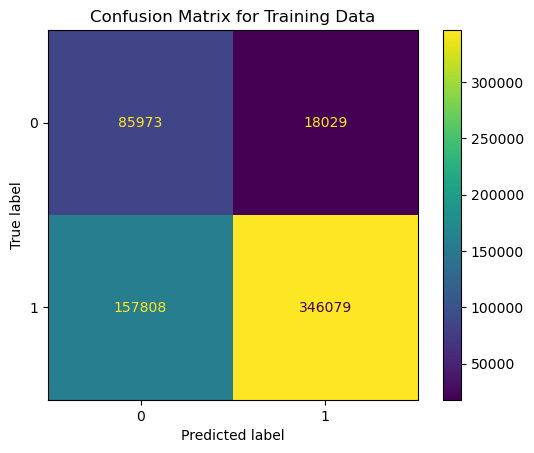

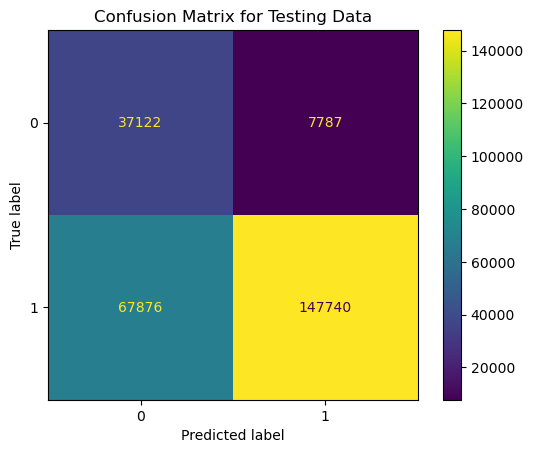

Classification Report for Training Data:
              precision    recall  f1-score   support

           0       0.35      0.83      0.49    104002
           1       0.95      0.69      0.80    503887

    accuracy                           0.71    607889
   macro avg       0.65      0.76      0.65    607889
weighted avg       0.85      0.71      0.75    607889


Classification Report for Testing Data:
              precision    recall  f1-score   support

           0       0.35      0.83      0.50     44909
           1       0.95      0.69      0.80    215616

    accuracy                           0.71    260525
   macro avg       0.65      0.76      0.65    260525
weighted avg       0.85      0.71      0.74    260525

Average Profit for Training Set: 4138.63
Average Profit for Test Set: 4062.47


In [12]:
# Make predictions
y_train_pred = logreg.predict(X_train_scaled)  # On the training set
y_test_pred = logreg.predict(X_test_scaled)  

# Confusion matrix for training data
train_cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(train_cm).plot()
plt.title("Confusion Matrix for Training Data")
plt.show()

# Confusion matrix for testing data
test_cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(test_cm).plot()
plt.title("Confusion Matrix for Testing Data")
plt.show()

# Classification reports for training and testing data
print("Classification Report for Training Data:")
print(classification_report(y_train, y_train_pred))
print("\nClassification Report for Testing Data:")
print(classification_report(y_test, y_test_pred))

avg_profit_train = calculate_expected_profit(y_train, y_train_pred, df.loc[y_train.index, 'DisbursementGross'])
avg_profit_test = calculate_expected_profit(y_test, y_test_pred, df.loc[y_test.index, 'DisbursementGross'])

print(f"Average Profit for Training Set: {avg_profit_train:.2f}")
print(f"Average Profit for Test Set: {avg_profit_test:.2f}")

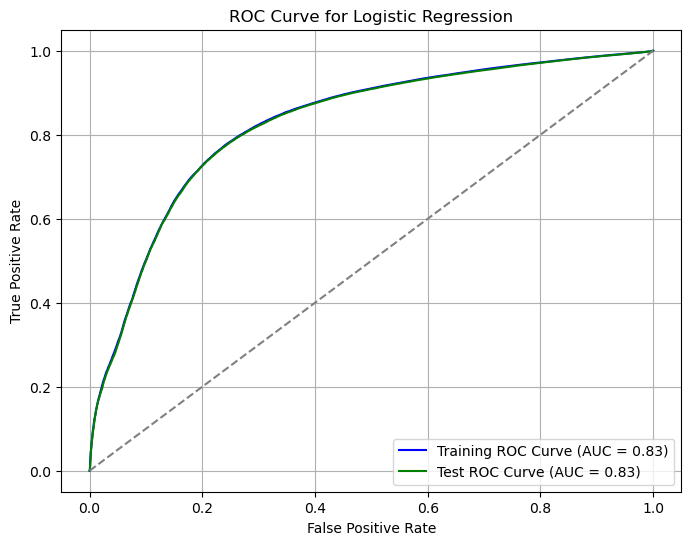

In [14]:
# Get the predicted probabilities for the positive class (1) for both training and test sets
train_probs = logreg.predict_proba(X_train_scaled)[:, 1]
test_probs = logreg.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and AUC for training data
train_fpr, train_tpr, _ = roc_curve(y_train, train_probs)
train_auc = auc(train_fpr, train_tpr)

# Compute ROC curve and AUC for test data
test_fpr, test_tpr, _ = roc_curve(y_test, test_probs)
test_auc = auc(test_fpr, test_tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, color='blue', label=f'Training ROC Curve (AUC = {train_auc:.2f})')
plt.plot(test_fpr, test_tpr, color='green', label=f'Test ROC Curve (AUC = {test_auc:.2f})')
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line for random guess

# Plot formatting
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Logistic Regression')
plt.legend(loc='lower right')
plt.grid()
plt.show()
